In [0]:
#importar bibliotecas
import numpy as np
import pandas as pd

import collections

from google.colab import drive 

import matplotlib.pyplot as plt

In [56]:
#acesso à drive - montar
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#importar csv para dataset do panda
dataset = pd.read_csv('/content/gdrive/My Drive/Trabalho de grupo/trabalhar/trifacta_origem/filipeSantos_TrifactaCsv.csv', delimiter = ',')

In [58]:
#ver conteúdo do dataset
dataset

,cidade,ano,pop_total,km2,desempregados,despesas_camara,receitas_camara,crimes_registados,cons_energia_kwh_por_hab,facebook_seguidores,youtube_seguidores,instagram_ashtag,twitter_followers,Codigo_postal,nome,nif,ultimo_ano_disp,prov_oper_ult_ano,cnae_2009,num_emp_ult_ano,dep_banc_caix_ult_ano,endivid_perc_ult_ano,res_op_ult_ano
0,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"SIERRA CORPORATE SERVICES - APOIO A GESTÃO, S.A.",504638998,12/31/2010,31785.113439,8211,233,509.04744,0.86725,2424.19744
1,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"MAILTEC CONSULTORIA, S.A.",504129040,12/31/2014,3926.068960,6201,50,682.49965,0.55231,407.65368
2,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"INGREDIENTE PRIMAVERA, LDA",513938931,12/31/2018,3242.847660,1043,0,43.95744,0.85083,-398.13498
3,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"ALÇADO DE PRIMAVERA, UNIPESSOAL, LDA",513924566,12/31/2018,942.282320,161,84,16.46130,1.36924,56.96538
4,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"PRIMAVERA DE CORES, UNIPESSOAL, LDA",507958314,12/31/2015,583.385590,5610,15,0.08008,1.18062,19.93995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Porto,2018,214936,41.4,12769,202746500,218769300,15948,NaN,128147,NaN,8055322,140.0,4000,"EFANOR - INVESTIMENTOS, SGPS, S.A.",502778466,12/31/2018,14485.757200,6420,0,382.68872,0.13792,13561.61925
80,Porto,2018,214936,41.4,12769,202746500,218769300,15948,NaN,128147,NaN,8055322,140.0,4000,"QUINTA DA PRIMAVERA - PROMOÇÃO IMOBILIÁRIA, S.A.",506762378,12/31/2015,1213.552620,4110,0,363.72266,0.64453,136.42942
81,Porto,2018,214936,41.4,12769,202746500,218769300,15948,NaN,128147,NaN,8055322,140.0,4000,"RITMOS DA PRIMAVERA, LDA",513532196,12/31/2018,851.661990,5630,9,154.20527,0.51377,64.24599
82,Porto,2018,214936,41.4,12769,202746500,218769300,15948,NaN,128147,NaN,8055322,140.0,4000,"DSTYPE, UNIPESSOAL LDA",508223326,12/31/2018,220.975090,8299,3,166.61037,0.20172,25.66302


In [0]:
#criou-se um data para cada um dos anos para evitar a duplicação do valor das empresas para cada ano do município
is_2010 = dataset[dataset['ano']==2010]

is_2018 = dataset[dataset['ano']==2018]

In [60]:
#ver dataset 2010 todos os dados empresas únicos, municípios duplicados x vezes o número de empresas
is_2010

,cidade,ano,pop_total,km2,desempregados,despesas_camara,receitas_camara,crimes_registados,cons_energia_kwh_por_hab,facebook_seguidores,youtube_seguidores,instagram_ashtag,twitter_followers,Codigo_postal,nome,nif,ultimo_ano_disp,prov_oper_ult_ano,cnae_2009,num_emp_ult_ano,dep_banc_caix_ult_ano,endivid_perc_ult_ano,res_op_ult_ano
0,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"SIERRA CORPORATE SERVICES - APOIO A GESTÃO, S.A.",504638998,12/31/2010,31785.113439,8211,233,509.04744,0.86725,2424.19744
1,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"MAILTEC CONSULTORIA, S.A.",504129040,12/31/2014,3926.068960,6201,50,682.49965,0.55231,407.65368
2,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"INGREDIENTE PRIMAVERA, LDA",513938931,12/31/2018,3242.847660,1043,0,43.95744,0.85083,-398.13498
3,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"ALÇADO DE PRIMAVERA, UNIPESSOAL, LDA",513924566,12/31/2018,942.282320,161,84,16.46130,1.36924,56.96538
4,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"PRIMAVERA DE CORES, UNIPESSOAL, LDA",507958314,12/31/2015,583.385590,5610,15,0.08008,1.18062,19.93995
5,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"MIL PRIMAVERAS, LDA",509469116,12/31/2018,467.445150,8731,17,27.25616,0.72793,67.03034
6,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"PASTELARIA PRIMAVERA, LDA",500393850,12/31/2008,165.742610,5630,1,0.00000,NaN,99.94471
7,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"PRIMAVERA MÁGICA - UNIPESSOAL, LDA",510006680,12/31/2013,106.665270,4771,6,2.45400,0.85356,4.01036
8,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"PRIMAVERA NO PRATO, UNIPESSOAL, LDA",507665937,12/31/2018,71.612490,5610,1,0.28817,2.91821,5.41108
9,Lisboa,2010,549210,84.9,23716,564333000,600698200,42234,6315.4,404965,4440.0,10541541,91100.0,1000,"PALCO DA PRIMAVERA EVENTOS, LDA",509636462,12/31/2018,62.103880,8230,0,1.29727,1.14256,44.40579


In [61]:
#ver dataset 2018 todos os dados empresas únicos, municípios duplicados x vezes o número de empresas
is_2018

,cidade,ano,pop_total,km2,desempregados,despesas_camara,receitas_camara,crimes_registados,cons_energia_kwh_por_hab,facebook_seguidores,youtube_seguidores,instagram_ashtag,twitter_followers,Codigo_postal,nome,nif,ultimo_ano_disp,prov_oper_ult_ano,cnae_2009,num_emp_ult_ano,dep_banc_caix_ult_ano,endivid_perc_ult_ano,res_op_ult_ano
23,Lisboa,2018,506654,100.1,18930,820249300,787585200,38252,NaN,404965,4440.0,10541541,91100.0,1000,"SIERRA CORPORATE SERVICES - APOIO A GESTÃO, S.A.",504638998,12/31/2010,31785.113439,8211,233,509.04744,0.86725,2424.19744
24,Lisboa,2018,506654,100.1,18930,820249300,787585200,38252,NaN,404965,4440.0,10541541,91100.0,1000,"MAILTEC CONSULTORIA, S.A.",504129040,12/31/2014,3926.068960,6201,50,682.49965,0.55231,407.65368
25,Lisboa,2018,506654,100.1,18930,820249300,787585200,38252,NaN,404965,4440.0,10541541,91100.0,1000,"INGREDIENTE PRIMAVERA, LDA",513938931,12/31/2018,3242.847660,1043,0,43.95744,0.85083,-398.13498
26,Lisboa,2018,506654,100.1,18930,820249300,787585200,38252,NaN,404965,4440.0,10541541,91100.0,1000,"ALÇADO DE PRIMAVERA, UNIPESSOAL, LDA",513924566,12/31/2018,942.282320,161,84,16.46130,1.36924,56.96538
27,Lisboa,2018,506654,100.1,18930,820249300,787585200,38252,NaN,404965,4440.0,10541541,91100.0,1000,"PRIMAVERA DE CORES, UNIPESSOAL, LDA",507958314,12/31/2015,583.385590,5610,15,0.08008,1.18062,19.93995
28,Lisboa,2018,506654,100.1,18930,820249300,787585200,38252,NaN,404965,4440.0,10541541,91100.0,1000,"MIL PRIMAVERAS, LDA",509469116,12/31/2018,467.445150,8731,17,27.25616,0.72793,67.03034
29,Lisboa,2018,506654,100.1,18930,820249300,787585200,38252,NaN,404965,4440.0,10541541,91100.0,1000,"PASTELARIA PRIMAVERA, LDA",500393850,12/31/2008,165.742610,5630,1,0.00000,NaN,99.94471
30,Lisboa,2018,506654,100.1,18930,820249300,787585200,38252,NaN,404965,4440.0,10541541,91100.0,1000,"PRIMAVERA MÁGICA - UNIPESSOAL, LDA",510006680,12/31/2013,106.665270,4771,6,2.45400,0.85356,4.01036
31,Lisboa,2018,506654,100.1,18930,820249300,787585200,38252,NaN,404965,4440.0,10541541,91100.0,1000,"PRIMAVERA NO PRATO, UNIPESSOAL, LDA",507665937,12/31/2018,71.612490,5610,1,0.28817,2.91821,5.41108
32,Lisboa,2018,506654,100.1,18930,820249300,787585200,38252,NaN,404965,4440.0,10541541,91100.0,1000,"PALCO DA PRIMAVERA EVENTOS, LDA",509636462,12/31/2018,62.103880,8230,0,1.29727,1.14256,44.40579


In [62]:
# 1º Qual o Distrito com maior quantidade de empresas?
# de um dos dataset anteriores contamos a quantidade de valores únicos relativamente ao distrito.
freq_cidadeEmp = is_2010.cidade.value_counts()
print(freq_cidadeEmp)

#idxmax devolve a posição do valor máximo numa coluna específica ou linha. como só temos uma coluna devolve a posição do valor máximo
index_MaxEmp = freq_cidadeEmp.idxmax()

print("O distrito com maior numero de empresas é", index_MaxEmp, "com o valor de ", freq_cidadeEmp.max(), " empresas.")

Lisboa    23
Braga     10
Porto      5
Faro       2
Aveiro     2
Name: cidade, dtype: int64
O distrito com maior numero de empresas é Lisboa com o valor de  23  empresas.


In [63]:
# 2º Qual o Distrito onde existe um volume de negócios mais elevado?
# Como se fala de volume de negócio irão ser usados os valores dos proveitos operacionais

freq_cidadeProv = is_2010.groupby('cidade')['prov_oper_ult_ano'].sum()

print(freq_cidadeProv)

index_MaxProv = freq_cidadeProv.idxmax()

print("O distrito com maior volume de negócios é", index_MaxProv, "com o valor de ", freq_cidadeProv.max(), ".")

cidade
Aveiro      438.347590
Braga     35407.578149
Faro        102.339500
Lisboa    41547.437259
Porto     16824.315390
Name: prov_oper_ult_ano, dtype: float64
O distrito com maior volume de negócios é Lisboa com o valor de  41547.43725899999 .


In [0]:
# 3º Qual a sustentabilidade económica de cada distrito? (rendimento – despesas)
#criar e data set do ano 2010 e 2018 só com as colunas referentes a receitas e despesas sem os valores duplicados
nodupl_2010 = is_2010.iloc[:, [0,2,5,6]].drop_duplicates()

nodupl_2018 = is_2018.iloc[:, [0,2,5,6]].drop_duplicates()

In [0]:
#correr só uma vez, depois de adicionada a coluna dá erro por já existir

nodupl_2010.insert(1,"Sustentabilidade", nodupl_2010.receitas_camara - nodupl_2010.despesas_camara)


In [0]:
#correr só uma vez, depois de adicionada a coluna dá erro por já existir

nodupl_2010.insert(2,"Sust_per_capita", nodupl_2010.Sustentabilidade / nodupl_2010.pop_total)

In [67]:
#ver para responder à pergunta

nodupl_2010

,cidade,Sustentabilidade,Sust_per_capita,pop_total,despesas_camara,receitas_camara
0,Lisboa,36365200,66.213652,549210,564333000,600698200
46,Braga,4659400,25.749939,180948,81048300,85707700
66,Aveiro,1705300,21.786289,78274,44342400,46047700
70,Faro,3453100,53.689595,64316,27536600,30989700
74,Porto,2055000,8.575005,239650,183176900,185231900


In [0]:
#correr só uma vez, depois de adicionada a coluna dá erro por já existir

nodupl_2018.insert(1,"Sustentabilidade", nodupl_2018.receitas_camara - nodupl_2018.despesas_camara)

In [0]:
#correr só uma vez, depois de adicionada a coluna dá erro por já existir

nodupl_2018.insert(2,"Sust_per_capita", nodupl_2018.Sustentabilidade / nodupl_2018.pop_total)

In [70]:
#ver para responder à pergunta

nodupl_2018

,cidade,Sustentabilidade,Sust_per_capita,pop_total,despesas_camara,receitas_camara
23,Lisboa,-32664100,-64.470230,506654,820249300,787585200
56,Braga,6029000,33.190018,181651,88142800,94171800
68,Aveiro,-637400,-8.195646,77773,66101500,65464100
72,Faro,8596500,141.048780,60947,32666700,41263200
79,Porto,16022800,74.546842,214936,202746500,218769300


In [0]:
# 4º Qual o distrito com maior densidade populacional?
# criar data set do ano 2010 e 2018 só com a coluna referente a densidade populacional sem os valores duplicados

dens_nodupl_2010 = is_2010.iloc[:, [0,2,3]].drop_duplicates()

dens_nodupl_2018 = is_2018.iloc[:, [0,2,3]].drop_duplicates()

dens_nodupl_2010.insert(1,"dens_pop", dens_nodupl_2010.pop_total / dens_nodupl_2010.km2)

dens_nodupl_2018.insert(1,"dens_pop", dens_nodupl_2018.pop_total / dens_nodupl_2018.km2)

In [72]:
# ver para responder
dens_nodupl_2010

,cidade,dens_pop,pop_total,km2
0,Lisboa,6468.904594,549210,84.9
46,Braga,986.630316,180948,183.4
66,Aveiro,396.123482,78274,197.6
70,Faro,318.711596,64316,201.8
74,Porto,5788.647343,239650,41.4


In [73]:
# ver para responder
dens_nodupl_2018

,cidade,dens_pop,pop_total,km2
23,Lisboa,5061.478521,506654,100.1
56,Braga,990.463468,181651,183.4
68,Aveiro,393.588057,77773,197.6
72,Faro,300.824284,60947,202.6
79,Porto,5191.690821,214936,41.4


In [0]:
# 5º Alguma(s) da(s) empresas apresenta(m) prejuízo?
# empresas estão duplicadas em 2 dataset, is_2010 e em is_2018, como tal basta escolher um deles para responder
is_less0 = is_2010[is_2010['res_op_ult_ano'] < 0]

prej_emp = is_less0.iloc[:, [14,22]].sort_values(ascending = True, by = 'res_op_ult_ano')

In [75]:
#ver para responder
prej_emp

,nome,res_op_ult_ano
2,"INGREDIENTE PRIMAVERA, LDA",-398.13498
78,"PRIMAVERANIMADA, UNIPESSOAL, LDA",-27.83595
12,"AVIARIO - AQUARIO PRIMAVERA, LDA",-23.60985
66,"PRIMAVERA À VISTA, LDA",-21.55891
18,"PRAÇA DA PRIMAVERA, UNIPESSOAL, LDA",-20.09711
55,"PRIMAVERA VERDE - INVESTIMENTOS IMOBILIÁRIOS, LDA",-16.56839
70,"MANOBRAS DA PRIMAVERA, UNIPESSOAL, LDA",-14.15208
13,"MINIMERCADO PRIMAVERA DA AJUDA, UNIPESSOAL, LDA",-10.66400
10,"ESTRELA DA PRIMAVERA, LDA",-8.63430
16,"TABACARIA PRIMAVERA, LDA",-6.21510


In [76]:
#a empresa com mais prejuizo é:
dataset.iloc[[is_2010['res_op_ult_ano'].idxmin()],[14,-1]]

,nome,res_op_ult_ano
2,"INGREDIENTE PRIMAVERA, LDA",-398.13498


In [77]:
# 6º Qual a empresa mais lucrativa?

dataset.iloc[[is_2010['res_op_ult_ano'].idxmax()],[14,-1]]

,nome,res_op_ult_ano
74,"EFANOR - INVESTIMENTOS, SGPS, S.A.",13561.61925


In [0]:
# 7º Qual a média do Resultado Operacional das empresas, por ano e por distrito? A Distribuição é normal? Porquê?

mean_emp = is_2010.groupby(['cidade','ultimo_ano_disp'])['res_op_ult_ano'].mean()

In [79]:
# ver a média agrupada do resultado
mean_emp

cidade  ultimo_ano_disp
Aveiro  12/31/2018          -10.703270
Braga   12/31/2007           30.473390
        12/31/2014          659.926210
        12/31/2018          753.525802
Faro    12/31/2012            0.515500
        12/31/2016          -14.152080
Lisboa  12/31/2006          -23.609850
        12/31/2008           46.864805
        12/31/2010         2424.197440
        12/31/2011           -1.437090
        12/31/2013            4.010360
        12/31/2014          407.653680
        12/31/2015            9.969975
        12/31/2016           -5.147813
        12/31/2018           -8.040336
Porto   12/31/2015          136.429420
        12/31/2018         3405.923077
Name: res_op_ult_ano, dtype: float64

Text(0, 0.5, 'Frequências')

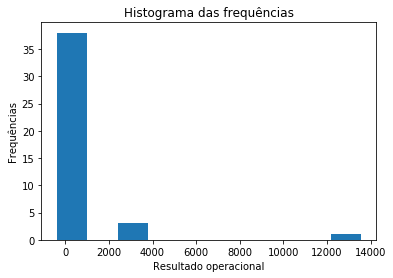

In [80]:
# gráfico dos resultados operacionais para verificar se é uma distribuição normal
x = is_2010.iloc[:,-1]
is_2010[is_2010['res_op_ult_ano'] < 0]

plt.hist(x)
plt.title('Histograma das frequências')
plt.xlabel('Resultado operacional')
plt.ylabel('Frequências')


In [81]:
# describe para medidas estatísticas base
x.describe()

count       42.000000
mean       553.980336
std       2164.323572
min       -398.134980
25%         -2.376217
50%          4.710720
75%         91.716117
max      13561.619250
Name: res_op_ult_ano, dtype: float64

In [82]:
# 68,26% dos valores têm de se localizar entre [média - desvio padrão; média + desvio padrão] para ser uma distribuição normal
n_v = x[(x > -1610) & (x < 2729)].count()
e_normal = n_v/x.count() > 0.6826

e_normal

True

In [83]:
# 8º Qual o distrito com melhor desempenho nas redes sociais, porquê?

rede_sociais = is_2010.iloc[:, [0, 9,10,11,12]].drop_duplicates()
rede_sociais

,cidade,facebook_seguidores,youtube_seguidores,instagram_ashtag,twitter_followers
0,Lisboa,404965,4440.0,10541541,91100.0
46,Braga,104939,1510.0,848859,63800.0
66,Aveiro,42423,183.0,663067,832.0
70,Faro,28573,160.0,1377499,NaN
74,Porto,128147,NaN,8055322,140.0


In [0]:
sum_redes =np.array(rede_sociais.sum(axis=0))

rede_sociais.insert(2,"racio_face", rede_sociais.facebook_seguidores / sum_redes[1])

In [0]:
rede_sociais.insert(4,"racio_yout", rede_sociais.youtube_seguidores / sum_redes[2])



In [0]:
rede_sociais.insert(6,"racio_inst", rede_sociais.instagram_ashtag / sum_redes[3])


In [0]:
rede_sociais.insert(8,"racio_twit", rede_sociais.twitter_followers / sum_redes[4])


In [88]:
rede_sociais

,cidade,facebook_seguidores,racio_face,youtube_seguidores,racio_yout,instagram_ashtag,racio_inst,twitter_followers,racio_twit
0,Lisboa,404965,0.571140,4440.0,0.705546,10541541,0.490617,91100.0,0.584454
46,Braga,104939,0.148000,1510.0,0.239949,848859,0.039507,63800.0,0.409310
66,Aveiro,42423,0.059831,183.0,0.029080,663067,0.030860,832.0,0.005338
70,Faro,28573,0.040298,160.0,0.025425,1377499,0.064111,NaN,NaN
74,Porto,128147,0.180731,NaN,NaN,8055322,0.374905,140.0,0.000898


In [0]:
# 9º Qual é o resultado operacional por funcionário / ano? (Resultado Operacional / Nº funcionários)
# como os dados da empresa só são referentes a um só ano irá-se calcular o Resultado Operacional / Nº funcionários

func_empr = is_2010.iloc[:, [14,19,22]]



In [0]:
func_empr.insert(3,"res/func", func_empr.res_op_ult_ano / func_empr.num_emp_ult_ano )

In [91]:
# ver resposta
func_empr.sort_values(ascending = False, by = 'res/func')

,nome,num_emp_ult_ano,res_op_ult_ano,res/func
15,JARDIM PRIMAVERA - EMPREENDIMENTOS IMOBILIÁRIO...,0,163.20892,inf
9,"PALCO DA PRIMAVERA EVENTOS, LDA",0,44.40579,inf
74,"EFANOR - INVESTIMENTOS, SGPS, S.A.",0,13561.61925,inf
75,"QUINTA DA PRIMAVERA - PROMOÇÃO IMOBILIÁRIA, S.A.",0,136.42942,inf
54,"PRIPT - BUSINESS SOFTWARE SOLUTIONS, UNIPESSOA...",0,53.32636,inf
49,"PRIMAVERA - SGPS, S.A.",2,2473.53807,1236.769035
50,"ACTOS DE PRIMAVERA, LDA",3,319.58748,106.529160
6,"PASTELARIA PRIMAVERA, LDA",1,99.94471,99.944710
52,"PINKCAR, UNIPESSOAL, LDA",1,20.42792,20.427920
46,"PRIMAVERA - BUSINESS SOFTWARE SOLUTIONS, S.A.",225,2822.24216,12.543298


In [0]:
# 10º Elabore um gráfico que demonstre o desempenho dos distritos nas redes sociais, juntamente com a sua população total e o número de desempregados.
# array com nome das cidades
nome_cidade = np.sort(np.array(is_2018['cidade'].drop_duplicates()))

#somatório das redes sociais por cidade
arr_redSoci_Cid = np.sort(np.array(rede_sociais.sum(axis=1)))

#array com a população total
arr_pop_tot = np.sort(np.array(is_2018['pop_total'].drop_duplicates()))

#array desempregados
arr_desemp = np.sort(np.array(is_2018['desempregados'].drop_duplicates()))

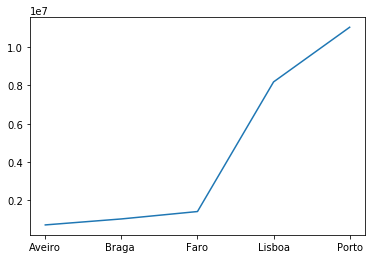

In [95]:
# gráfico dns redes sociais
plt.plot(nome_cidade,arr_redSoci_Cid)

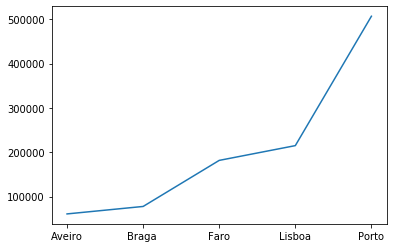

In [96]:
# gráfico da população total 

plt.plot(nome_cidade,arr_pop_tot)

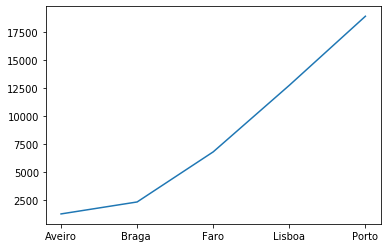

In [97]:
# gráfico desempregados
plt.plot(nome_cidade,arr_desemp)

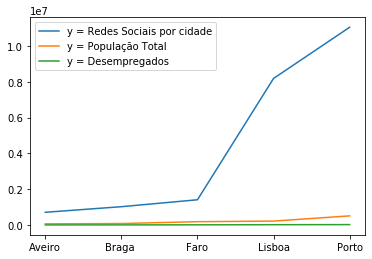

In [102]:
plt.plot(nome_cidade,arr_redSoci_Cid)
plt.plot(nome_cidade,arr_pop_tot)
plt.plot(nome_cidade,arr_desemp)

plt.legend(['y = Redes Sociais por cidade', 'y = População Total', 'y = Desempregados'], loc='upper left')


plt.show()